In [1]:
#Pandas Library Import
import pandas as pd

In [2]:
#Reading csvfile from location
df = pd.read_csv("datasets/avocado.csv")
df["Date"] = pd.to_datetime(df["Date"])

In [3]:
#Creating new dataframe from existing dataframe with specific columns
albany_df = df[df["region"]=="Albany"]
albany_df = albany_df.set_index("Date")
#Quick plotting in Jupyter Notebook
albany_df["AveragePrice"].plot()

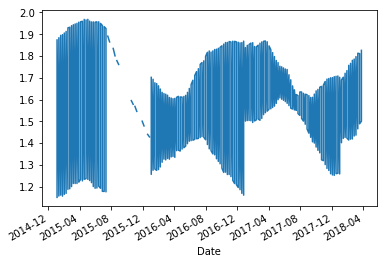

In [4]:
#Moving Average in Python
albany_df["AveragePrice"].rolling(25).mean().plot()

Above graph Dates are not in proper order.

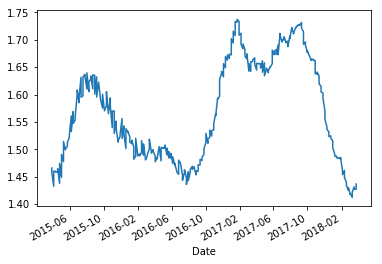

In [5]:
#Sorting dataframe by index
albany_df.sort_index(inplace=True)

#We will plot Moving Average again
albany_df["AveragePrice"].rolling(25).mean().plot()

In [6]:
#We will save 25 MA to new column
albany_df["price25MA"] = albany_df["AveragePrice"].rolling(25).mean()

In [7]:
albany_df.tail(3)

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,price25MA
Date,,,,,,,,,,,,,,
2018-03-18,1,1.35,105304.65,13234.86,61037.58,55.00,30977.21,26755.90,3721.31,500.0,conventional,2018,Albany,1.4276
2018-03-25,0,1.57,149396.50,16361.69,109045.03,65.45,23924.33,19273.80,4270.53,380.0,conventional,2018,Albany,1.4272
2018-03-25,0,1.71,2321.82,42.95,272.41,0.00,2006.46,1996.46,10.00,0.0,organic,2018,Albany,1.4368


In [8]:
# To avoid pandas warning
albany_df = df.copy()[df["region"] == "Albany"]
albany_df.set_index("Date", inplace=True)
albany_df.sort_index(inplace=True)
albany_df["price25MA"] = albany_df["AveragePrice"].rolling(25).mean()

In [9]:
#To check no. of regions
list(set(df["region"].values.tolist()))

['GrandRapids',
 'Jacksonville',
 'GreatLakes',
 'Chicago',
 'NewOrleansMobile',
 'Southeast',
 'StLouis',
 'CincinnatiDayton',
 'Boston',
 'Detroit',
 'Philadelphia',
 'Nashville',
 'BuffaloRochester',
 'TotalUS',
 'Louisville',
 'Tampa',
 'Roanoke',
 'Charlotte',
 'HartfordSpringfield',
 'Atlanta',
 'SanFrancisco',
 'Columbus',
 'Pittsburgh',
 'Midsouth',
 'Boise',
 'PhoenixTucson',
 'NorthernNewEngland',
 'DallasFtWorth',
 'SouthCentral',
 'SouthCarolina',
 'Northeast',
 'Spokane',
 'Denver',
 'NewYork',
 'Portland',
 'Seattle',
 'California',
 'SanDiego',
 'WestTexNewMexico',
 'LasVegas',
 'Syracuse',
 'Albany',
 'Houston',
 'RichmondNorfolk',
 'LosAngeles',
 'Sacramento',
 'West',
 'Plains',
 'HarrisburgScranton',
 'BaltimoreWashington',
 'MiamiFtLauderdale',
 'RaleighGreensboro',
 'Orlando',
 'Indianapolis']

In [10]:
#Easier Pandas Method
df['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [13]:
graph_df = pd.DataFrame()

for region in df['region'].unique()[:16]: #We dont want to graph of all regions
    print(region)
    region_df = df.copy()[df['region']==region]
    region_df.set_index("Date", inplace=True)
    region_df.sort_index(inplace=True)
    region_df[f"{region}_price25MA"] = region_df["AveragePrice"].rolling(25).mean()    
    
    if graph_df.empty:
        graph_df = region_df[[f'{region}_price25MA']]
        
    else:
        graph_df = graph_df.join(region_df[f'{region}_price25MA'])
    

Albany
Atlanta
BaltimoreWashington
Boise
Boston
BuffaloRochester
California
Charlotte
Chicago
CincinnatiDayton
Columbus
DallasFtWorth
Denver
Detroit
GrandRapids
GreatLakes


In [17]:
import pandas as pd
df = pd.read_csv("datasets/avocado.csv")
df = df.copy()[df['type']=="organic"]
df["Date"] = pd.to_datetime(df["Date"])

df.sort_values(by="Date", ascending=True, inplace=True)

graph_df = pd.DataFrame()

for region in df['region'].unique(): 
    print(region)
    region_df = df.copy()[df['region']==region]
    region_df.set_index("Date", inplace=True)
    region_df.sort_index(inplace=True)
    region_df[f"{region}_price25MA"] = region_df["AveragePrice"].rolling(25).mean()    
    
    if graph_df.empty:
        graph_df = region_df[[f'{region}_price25MA']]
        
    else:
        graph_df = graph_df.join(region_df[f'{region}_price25MA'])
        
graph_df.tail(3)

California
LasVegas
PhoenixTucson
BuffaloRochester
Spokane
LosAngeles
Philadelphia
Boston
StLouis
Louisville
Orlando
Southeast
Boise
MiamiFtLauderdale
NorthernNewEngland
BaltimoreWashington
Midsouth
Tampa
West
Northeast
Atlanta
Nashville
TotalUS
Syracuse
WestTexNewMexico
Jacksonville
Charlotte
Sacramento
GrandRapids
Roanoke
Denver
SanDiego
GreatLakes
RichmondNorfolk
DallasFtWorth
SanFrancisco
HarrisburgScranton
Pittsburgh
RaleighGreensboro
Seattle
HartfordSpringfield
Portland
CincinnatiDayton
SouthCarolina
Houston
Chicago
Plains
Indianapolis
SouthCentral
Columbus
Albany
Detroit
NewOrleansMobile
NewYork


,California_price25MA,LasVegas_price25MA,PhoenixTucson_price25MA,BuffaloRochester_price25MA,Spokane_price25MA,LosAngeles_price25MA,Philadelphia_price25MA,Boston_price25MA,StLouis_price25MA,Louisville_price25MA,...,Houston_price25MA,Chicago_price25MA,Plains_price25MA,Indianapolis_price25MA,SouthCentral_price25MA,Columbus_price25MA,Albany_price25MA,Detroit_price25MA,NewOrleansMobile_price25MA,NewYork_price25MA
Date,,,,,,,,,,,,,,,,,,,,,
2018-03-11,1.8636,1.8440,1.7324,1.2652,2.0552,1.8284,1.6300,1.7824,1.8468,1.6508,...,1.5696,1.7836,1.7672,1.454,1.5400,1.5496,1.5044,1.4444,1.5076,1.9092
2018-03-18,1.8516,1.8204,1.7216,1.2560,2.0012,1.8160,1.6304,1.7932,1.8192,1.6176,...,1.5360,1.7732,1.7452,1.432,1.5204,1.5088,1.5140,1.4092,1.4860,1.8948
2018-03-25,1.8364,1.7968,1.7104,1.2416,1.9496,1.8016,1.6256,1.7984,1.7976,1.5844,...,1.5128,1.7672,1.7232,1.416,1.5072,1.4848,1.5188,1.3964,1.4616,1.8876


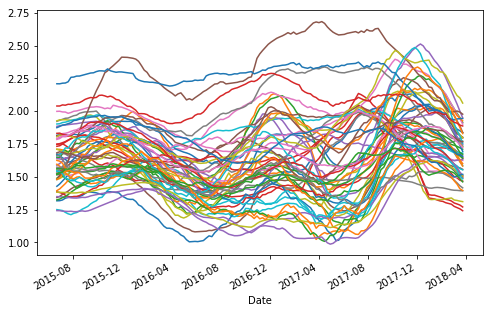

In [22]:
graph_df.dropna().plot(figsize=(8,5), legend=False)